#Clone git

In [1]:
!git clone https://github.com/truongcntn2017/ImageProcessing.git

fatal: destination path 'ImageProcessing' already exists and is not an empty directory.


In [2]:
cd ImageProcessing/

/content/ImageProcessing


#Import package

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os.path
import sys

In [0]:
from google.colab.patches import cv2_imshow

#Utils

In [0]:
def read_image(path, mode: int):
    """
        This function is read image from path
        Read by cv2 has parameters: path, mode = 1
        Read by matplotlib has parameters: path, mode = 2
        Read by pillow has parameters: path, mode = 3
    """
    try: 
        with open(path) as f:
            if mode == 1:
                img = cv2.imread(path)
            elif mode == 2:
                img = mpimg.imread(path)
            elif mode == 3:
                img = Image.open(path)
            else:
                img = None
        return img
    except EOFError as e:
        raise(e)

In [0]:
def write_image(path, mode: int, img):
    """
        This function is read image from path
        Read by cv2 has parameters: path, mode = 1
        Read by matplotlib has parameters: path, mode = 2
        Read by pillow has parameters: path, mode = 3
    """
    try:
      if mode == 1:
        cv2.imwrite(path, img)
      elif mode == 2:
        mpimg.imsave(path, img)
      elif mode == 3:
        img.save(path)
      else:
         pass
    except EOFError as e:
      raise(e)

#Convolution Operation

In [0]:
class Convolution:
  def convolution_point(self, x: int, y: int, z: int):
    """
    """
    kernel_shape = self.kernel.shape
    result = 0.0

    for x_kernel in range(kernel_shape[0]):
      for y_kernel in range(kernel_shape[1]):
        result += self.kernel[x_kernel,y_kernel]*self.image[x + x_kernel,y + y_kernel,z]
  
    return result

  def convolution(self):
    kernel_shape = self.kernel.shape
    image_shape = self.image.shape
    result = []

    for x in range(image_shape[0] - kernel_shape[0]):
      for y in range(image_shape[1] - kernel_shape[1]):
        for z in range(image_shape[2]):
          result.append(self.convolution_point(x,y,z))

    length = kernel_shape[0]*kernel_shape[1]
    result = np.array(result)
    result = result.reshape(image_shape[0] - kernel_shape[0], image_shape[1] - kernel_shape[1], image_shape[2])

    return result

  def __init__(self, kernel: np.ndarray, image: np.ndarray):
    self.kernel = kernel
    self.image = image
    self.items = self.convolution()

#Blur

In [0]:
def gauss2D(shape=(3,3),sigma= 3):
    """
    2D gaussian mask
    fspecial('gaussian',[shape],[sigma])
    """
    try:
      m, n = [(x - 1.) / 2. for x in shape]
      y, x = np.ogrid[-m:m+1,-n:n+1]

      height = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
      height[ height < np.finfo(height.dtype).eps*height.max() ] = 0

      sum_height = np.sum(height)
      if sum_height != 0:
        height /= sum_height

      return height
    except EOFError as e:
      raise(e)

In [0]:
class Blur:
  """
  Blur is class that can blur image
  Mean blur has parameters: mode = 1
  Gaussian blur has parameters: mode = 2
  """
  def makeKernel(self, mode: int):
    try:
      if mode == 1:
        kernel = np.array([[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0]]) /9
      elif mode == 2:
        kernel = np.array(gauss2D())
      else:
        kernel = None

      return kernel
    except EOFError as e:
      raise(e)

  def __init__(self, image, mode: int in [1, 2]):
    """
      path: where is image in directory,
      mode: 1 (mean blur), 2 (gaussian blur)
    """
    self.kernel = self.makeKernel(mode)
    self.image = image
    self.items = Convolution(self.kernel, self.image).items

##Testing

In [0]:
image = read_image('data/lena.png', 1)

In [0]:
mean_blur_image = Blur(image, 1).items

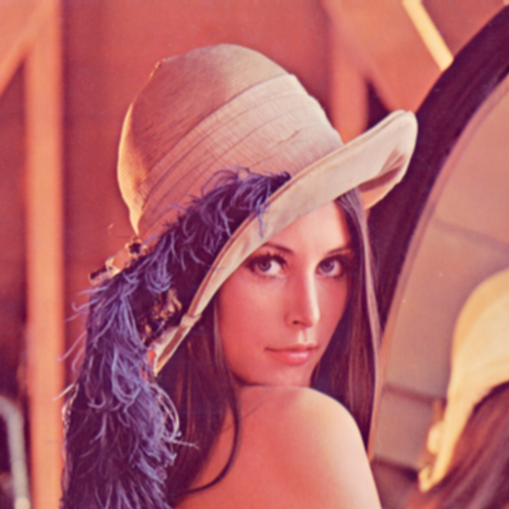

In [12]:
cv2_imshow(mean_blur_image)

In [0]:
gaussian_blur_image = Blur(image, 2).items

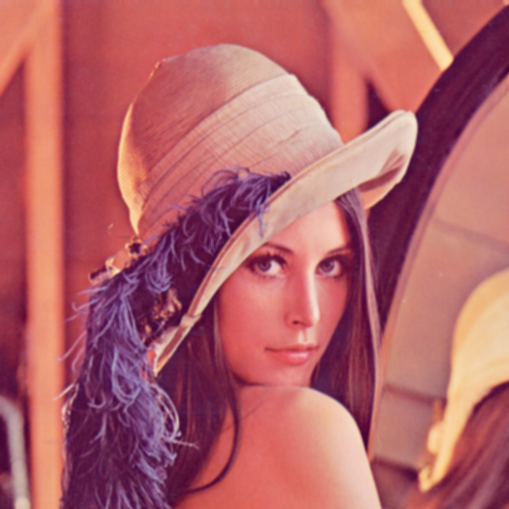

In [14]:
cv2_imshow(gaussian_blur_image)

#Color transformer

In [0]:
def calHistogram(image):
  try:
    image_shape = image.shape 
    hist = np.array([0]*256)

    for x in range(image_shape[0]):
      for y in range(image_shape[1]):
        if len(image_shape) == 3:
          hist[int(image[x,y,0])] += 1
        else:
          hist[int(image[x,y])] += 1

    return hist
  except EOFError as e:
    raise(e)

In [0]:
class ColorTransformer:
    """
    Color transformer is class that can transform
    Increase bright has parameters: mode = 1, 
    Increase contrast has parameters: mode = 2,
    Histogram equalization has parameters: mode = 3
    """
    def calHistogram(self):
      try:
        image_shape = self.image.shape 
        hist = np.array([0]*256)

        for x in range(image_shape[0]):
          for y in range(image_shape[1]):
            if len(image_shape) == 3:
              hist[int(self.image[x,y,0])] += 1
            else:
              hist[int(self.image[x,y])] += 1

        return hist
      except EOFError as e:
        raise(e)

    def calCumsum(self):
        try:
            cumsum = np.array([0]*256)
            cumsum[0] = self.hist[0]
            for i in range(1,256):
                cumsum[i] = cumsum[i-1] + self.hist[i]

            return cumsum
        except EOFError as e:
            raise(e)

    def plotHistogram(self):
        try:
            x = np.array([0]*len(self.hist))
            figure = plt.plot(self.hist)
        except EOFError as e:
            raise(e)

    def increase_brightness(self, increasing_value= 10):#load rgb image
        try:
            hsv = cv2.cvtColor(self.image, cv2.COLOR_BGR2HSV)
            hue, saturation, value = cv2.split(hsv)

            lim = 255 - increasing_value
            value[value > lim] = 255
            value[value <= lim] += increasing_value

            final_hsv = cv2.merge((hue, saturation, value))
            image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
            return image
        except EOFError as e:
            raise(e)

    def increase_constrast(self):#load rgb image
        try:
            hsv = cv2.cvtColor(self.image, cv2.COLOR_BGR2HSV)
            hue, saturation, value = cv2.split(hsv)

            k = int(255/np.max(value))
            value *= k

            final_hsv = cv2.merge((hue, saturation, value))
            image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
            return image
        except EOFError as e:
            raise(e)

    def max_min_normalize(self, cumsum):
        try:
            cumsum = (cumsum - cumsum.min())*255 / (cumsum.max() - cumsum.min())
            return cumsum.astype('uint8')
        except EOFError as e:
            raise(e)

    def histogram_equalization(self):
        self.hist = self.calHistogram()
        cumsum = self.calCumsum()
        cumsum = self.max_min_normalize(cumsum)

        return cumsum[image]

    def color_transform(self):
        try:
            if self.mode == 1:
                return self.increase_brightness()
            elif self.mode == 2:
                return self.increase_constrast()
            else:
                return self.histogram_equalization()
        except EOFError as e:
            raise(e)

    def __init__(self, image: np.ndarray, mode: int in [1, 2, 3]):
        self.image = image
        self.mode = mode
        self.items = self.color_transform()

##Testing

In [0]:
image = read_image('data/test.png', 1)

In [0]:
colorTransformer = ColorTransformer(image, 1)

In [0]:
bright_image = ColorTransformer(image, 1).items

In [0]:
contrast_image = ColorTransformer(image, 2).items

In [0]:
histogram_equalization_image = ColorTransformer(image, 3).items

##Origin image vs bright image

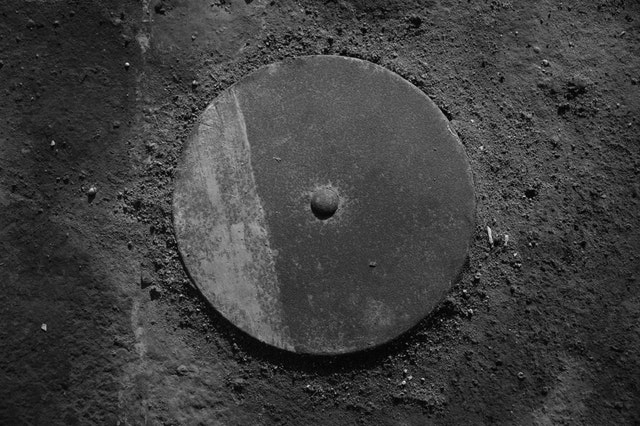

In [22]:
cv2_imshow(image) # Origin image

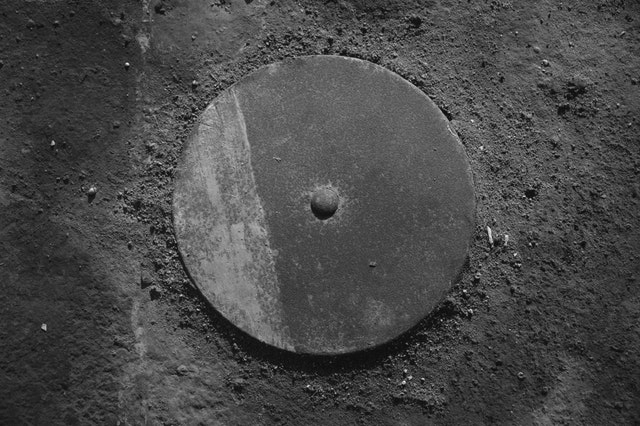

In [23]:
cv2_imshow(bright_image) # Bright image

##Graph origin image vs bright image

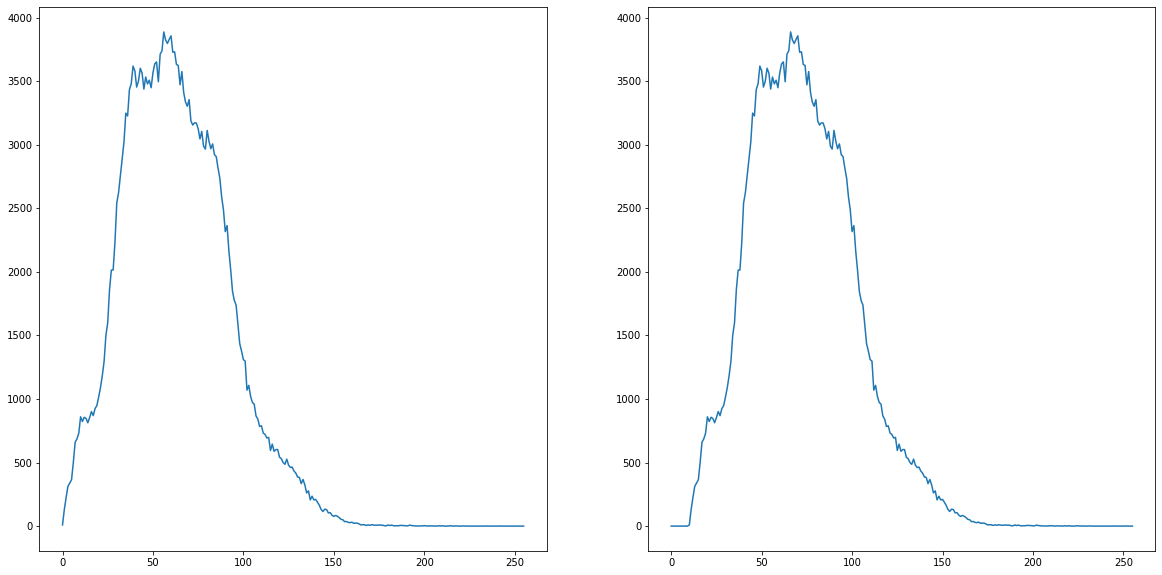

In [24]:
plt.figure(1, figsize=(20, 10))
plt.subplot(121)
plt.plot(calHistogram(image));
plt.subplot(122)
plt.plot(calHistogram(bright_image));

##Origin image vs contrast image

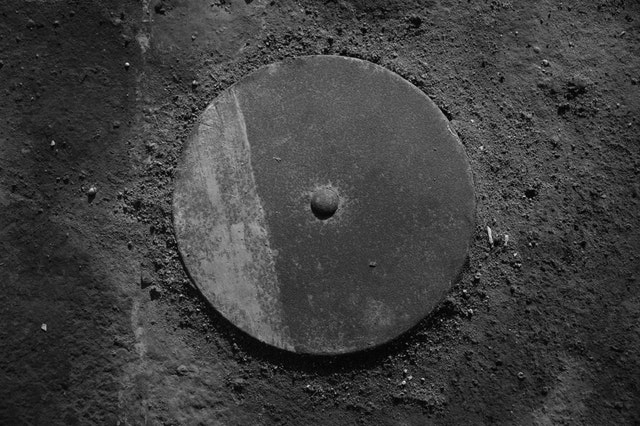

In [25]:
cv2_imshow(image) # Origin image

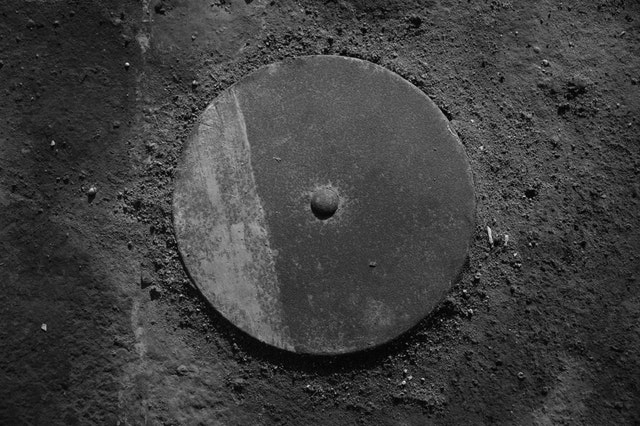

In [26]:
cv2_imshow(contrast_image)

##Graph origin image vs contrast image

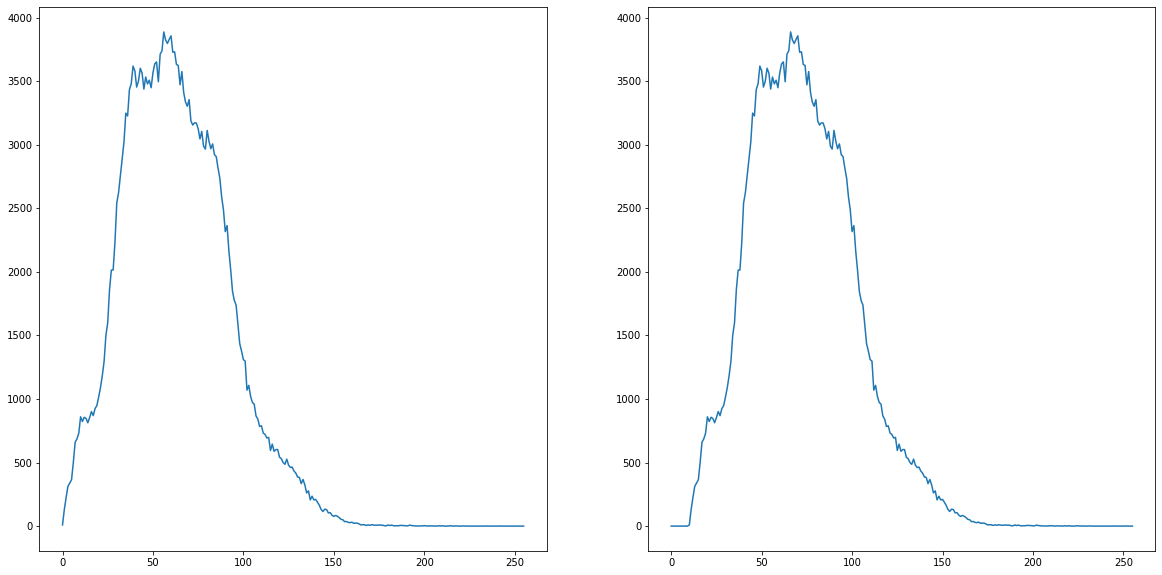

In [27]:
plt.figure(1, figsize=(20, 10))
plt.subplot(121)
plt.plot(calHistogram(image));
plt.subplot(122)
plt.plot(calHistogram(bright_image));

##Origin image vs histogram equalization image




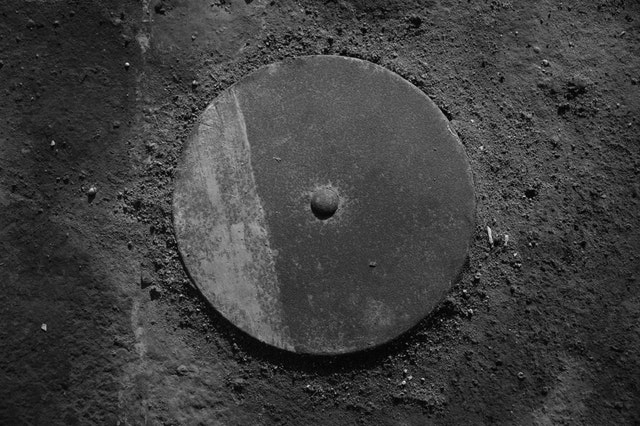

In [28]:
cv2_imshow(image)

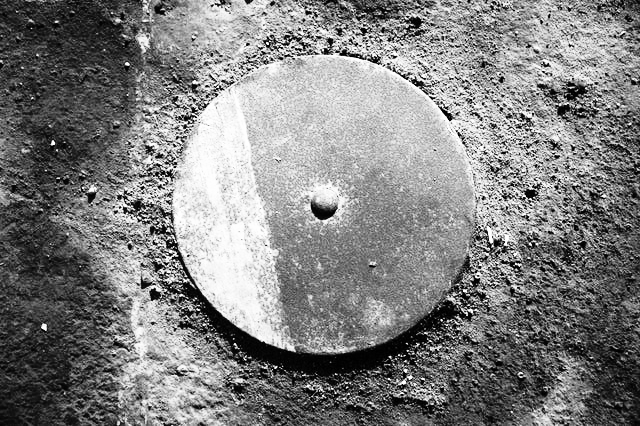

In [29]:
cv2_imshow(histogram_equalization_image)

##Graph origin image vs histogram equalization image



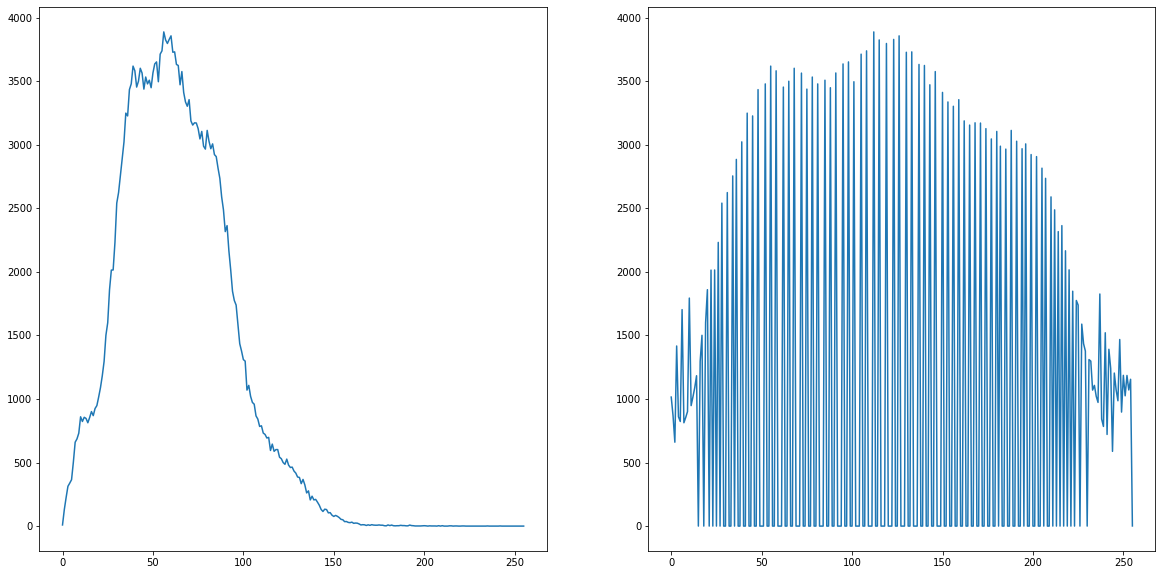

In [30]:
plt.figure(1, figsize=(20, 10))
plt.subplot(121)
plt.plot(calHistogram(image));
plt.subplot(122)
plt.plot(calHistogram(histogram_equalization_image));

#Geometric matrix

In [0]:
class GeometricMatrix:
  """
   Geometric matrix is class that can make rotation matrix, translation matrix, scale matrix
   Rotation matrix has parameters: mode = 1, angle = ?
   Translation matrix has parameters: mode = 2, x = ?, y = ?
   Scale matrix matrix has parameters: mode = 3, scale = ?
   Result: items properties 
  """
  def get_rotation(self, angle):
    try:
      angle = np.radians(angle)
      return np.array([[np.cos(angle), -np.sin(angle), 0], [np.sin(angle), np.cos(angle), 0], [0, 0, 1]])
    except EOFError as e:
      raise(e)

  def get_translation(self, dx, dy):
    try:
      return np.array([[1, 0, dx], [0, 1, dy], [0, 0, 1]])
    except EOFError as e:
      raise(e)

  def get_scale(self, scale):
    try:
      return np.array([[scale, 0, 0], [0, scale, 0], [0, 0, 1]])
    except EOFError as e:
      raise(e)

  def get_matrix(self):
    try:
      if self.mode == 1:
        return self.get_rotation(self.args[0])
      elif self.mode == 2:
        return self.get_translation(self.args[0], self.args[1])
      elif self.mode == 3:
        return self.get_scale(self.args[0])
      else:
        return None
    except EOFError as e:
      raise(e)


  def __init__(self, mode: int, **kwargs):
    self.mode = mode
    self.args = [x for x in kwargs.values()]
    self.items = self.get_matrix()

  def __repr__(self):
    strings = str(self.items)
    return strings

In [0]:
class GeometricTransformation:
  """
  Geometric transformation is class that can transform by a matrix
  Transform has parameters: image, matrix
  Result: items properties
  """
  def init_shape(self):
    shape = np.zeros(3,dtype=int)
    matrix = abs(self.matrix)

    shape[0] = int(matrix[0][0]*self.image.shape[0]) if matrix[0][0] > matrix[0][1] else int(matrix[0][1]*self.image.shape[1])
    shape[1] = int(matrix[1][1]*self.image.shape[1]) if matrix[1][1] > matrix[1][0] else int(matrix[1][0]*self.image.shape[0])
    shape[2] = self.image.shape[2]

    return shape

  def nearest_neighbors(self, i, j):
    try:
      x_max, y_max = self.image.shape[0] - 1, self.image.shape[1] - 1
      x, y, _ = self.inv_matrix @ np.array([i, j, 1])
      x = int(np.floor(x))
      y = int(np.floor(y))

      if x == x_max:
        x -= 1
    
      if y == y_max:
        y -= 1

      return (self.image[x, y,:]/4 + self.image[x + 1, y, :]/4 + self.image[x, y + 1,:]/4 + self.image[x + 1, y + 1,:]/4)
    except EOFError as e:
      raise(e)

  def transform(self):
    try:
      shape = self.init_shape()
      self.items = np.zeros(shape, dtype='float32')

      for i, row in enumerate(self.items):
        for j, col in enumerate(row):
          self.items[i, j, :] = self.nearest_neighbors(i, j)

      return self.items
    except EOFError as e:
      raise(e)

  def __init__(self, image, matrix):
    self.image = image
    self.matrix = matrix
    self.inv_matrix = np.linalg.inv(self.matrix)
    self.items = self.transform()

  def __repr__(self):
    strings = str(self.items)
    return strings

##Testing


In [0]:
image = read_image('data/lena.png', 1)

In [0]:
rotation_image = GeometricTransformation(image, GeometricMatrix(1, angle=90).items).items

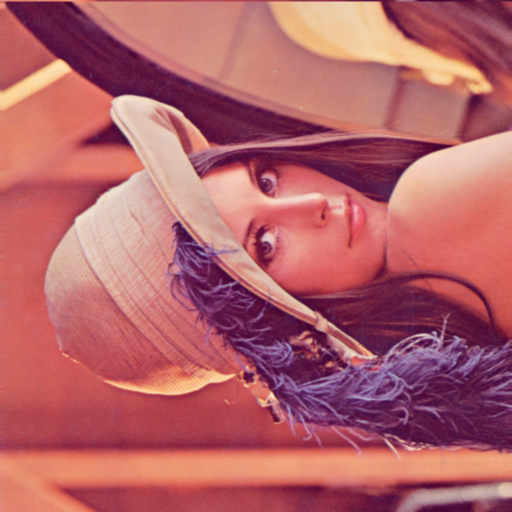

In [35]:
cv2_imshow(rotation_image)

In [0]:
scale_image = GeometricTransformation(image, GeometricMatrix(3, scale = 2).items).items

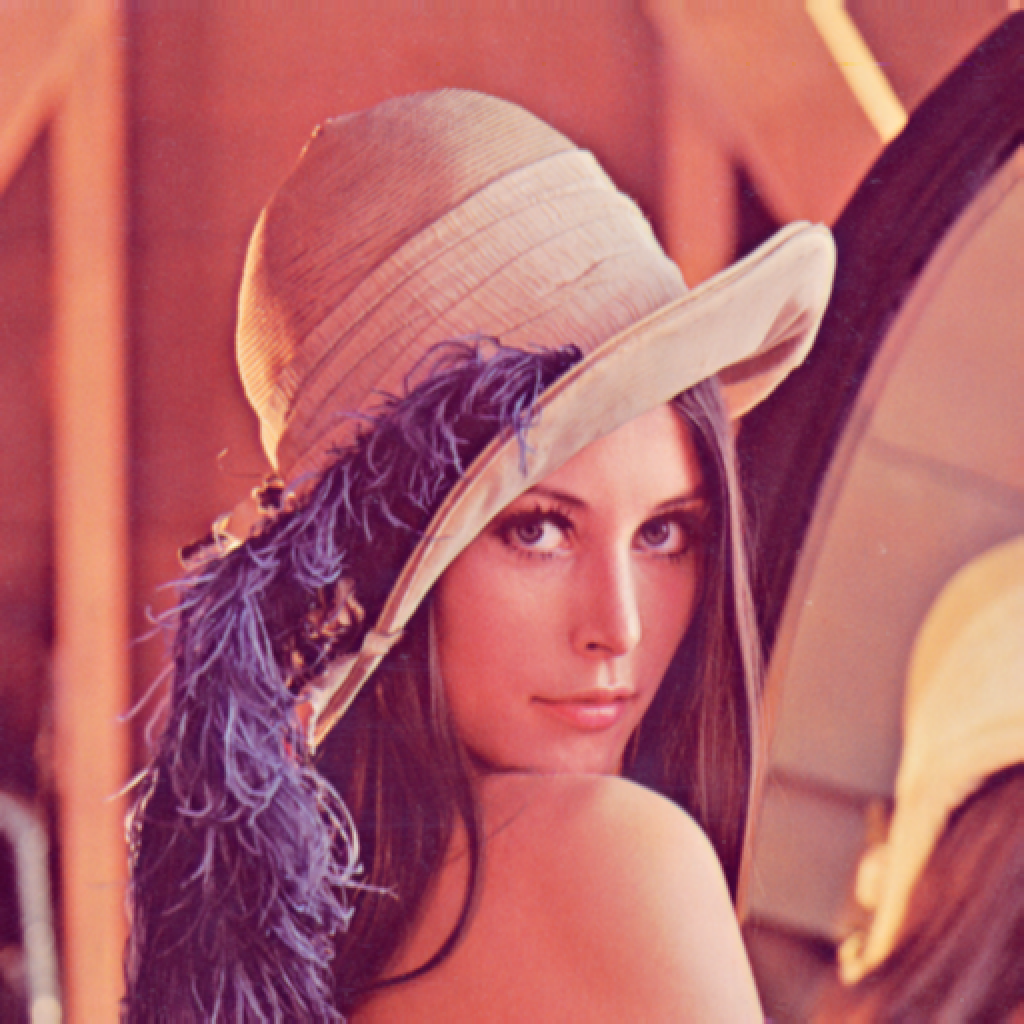

In [37]:
cv2_imshow(scale_image)

#Reference

1.   https://stackoverflow.com/questions/29731726/how-to-calculate-a-gaussian-kernel-matrix-efficiently-in-numpy

2. https://towardsdatascience.com/image-geometric-transformation-in-numpy-and-opencv-936f5cd1d315

3. https://github.com/huskarit99/Image_Processing_HCMUS
